# Определение перспективного тарифа для телеком компании

**План**:    
1. [Изучить общую информацию.](#info)
2. [Предобработать данные:](#pp)
  - изучить и заполнить пропуски;
  - обработать дубликаты;
  - изменить типы данных.  
3. [Подготовить данные к анализу:](#prep)
   - создать таблицу с данными об использовании услуг каждым пользователем.
4. [Проанализировать данные:](#an)
   - посчитать среднюю выручку для каждого пользователя;
   - посчитать среднее, дисперсию и стандартное отклонение для звонков, СМС и трафика;
   - построить и изучить гистограммы.
5. [Выдвинуть и проверить гипотезы.](#hyp)
6. [Написать вывод.](#conclusion)

<a id='info'></a>

## Изучаем общую информацию <a name="general_info"></a>

Для начала импортируем все нужные библитеки, откроем все датасеты и изучим информацию в них и о них.

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt

In [2]:
calls = pd.read_csv('/datasets/calls.csv')
internet = pd.read_csv('/datasets/internet.csv')
messages = pd.read_csv('/datasets/messages.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')
users = pd.read_csv('/datasets/users.csv')

Создадим список датасетов, чтобы автоматизировать методы, применяемые к ним. А также присвоим каждому имя, чтобы удобно было выводить результат.

In [3]:
datasets = [calls, internet, messages, users, tariffs]

In [4]:
calls.name = 'Звонки'
internet.name = 'Интернет'
messages.name = 'СМС'
users.name = 'Пользователи'
tariffs.name = 'Тарифы'

Автоматизируем вывод общей информации о таблицах и изучим её.

In [5]:
# напишем функцию, которая принимает список датасетов и выводит общую информацию о каждом из них
def general_info(data):
    for dataset in data:
        print(dataset.name + ':')
        display(dataset.info())
        display(dataset.describe())
        display(dataset.head())
        print()

In [6]:
general_info(datasets)

Звонки:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


None

,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000



Интернет:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


None

,Unnamed: 0,mb_used,user_id
count,149396.000000,149396.000000,149396.000000
mean,74697.500000,370.192426,1252.099842
std,43127.054745,278.300951,144.050823
min,0.000000,0.000000,1000.000000
25%,37348.750000,138.187500,1130.000000
50%,74697.500000,348.015000,1251.000000
75%,112046.250000,559.552500,1380.000000
max,149395.000000,1724.830000,1499.000000


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000



СМС:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


None

,user_id
count,123036.000000
mean,1256.989410
std,143.523967
min,1000.000000
25%,1134.000000
50%,1271.000000
75%,1381.000000
max,1499.000000


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000



Пользователи:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


None

,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra



Тарифы:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


None

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
std,671.751442,10861.160159,1767.766953,989.949494,35.355339,1.414214,1.414214
min,50.000000,15360.000000,500.000000,550.000000,150.000000,1.000000,1.000000
25%,287.500000,19200.000000,1125.000000,900.000000,162.500000,1.500000,1.500000
50%,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
75%,762.500000,26880.000000,2375.000000,1600.000000,187.500000,2.500000,2.500000
max,1000.000000,30720.000000,3000.000000,1950.000000,200.000000,3.000000,3.000000


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


### Вывод

В данных нет пропусков (по крайней мере явных). Пропуски в столбце `churn_date` таблицы с пользователями означают, что пользователь продолжает им пользоваться.

Также есть явно ненужные столбцы: `Unnamed: 0` в данных об использовании интернета, судя по информации из метода `describe()`, полностью дублирует столбец с индексами строк.

Ещё мы обнаружили проблемами с типами данных: данные о дате имеют тип `object`, а не `datetime`. Поправим их в следующем шаге.

<a id='pp'></a>

## Предобработка данных <a name="preprocessing"></a>

При помощи автоматизации посмотрим на количество дубликатов в таблицах.

In [7]:
for dataset in datasets:
    print(dataset.name + ':', dataset.duplicated().sum())

Звонки: 0
Интернет: 0
СМС: 0
Пользователи: 0
Тарифы: 0


Дубликатов нет ни в одной из них. Можно двигаться дальше. Теперь поменяем типы данных столбцов с датами (тоже при помощи автоматизации).

In [8]:
for dataset in datasets:
    for column in dataset.columns:
        if 'date' in column:
            dataset[column] = pd.to_datetime(dataset[column], format='%Y-%m-%d')

Проверим, удалось ли нам изменить типы данных сразу во всех столбцах с датами всех таблиц. Для этого воспользуемся написанной ранее функцией.

In [9]:
general_info(datasets)

Звонки:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null datetime64[ns]
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.2+ MB


None

,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000



Интернет:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null datetime64[ns]
user_id         149396 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 5.7+ MB


None

,Unnamed: 0,mb_used,user_id
count,149396.000000,149396.000000,149396.000000
mean,74697.500000,370.192426,1252.099842
std,43127.054745,278.300951,144.050823
min,0.000000,0.000000,1000.000000
25%,37348.750000,138.187500,1130.000000
50%,74697.500000,348.015000,1251.000000
75%,112046.250000,559.552500,1380.000000
max,149395.000000,1724.830000,1499.000000


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000



СМС:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null datetime64[ns]
user_id         123036 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


None

,user_id
count,123036.000000
mean,1256.989410
std,143.523967
min,1000.000000
25%,1134.000000
50%,1271.000000
75%,1381.000000
max,1499.000000


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000



Пользователи:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null datetime64[ns]
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null datetime64[ns]
tariff        500 non-null object
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


None

,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra



Тарифы:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


None

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
std,671.751442,10861.160159,1767.766953,989.949494,35.355339,1.414214,1.414214
min,50.000000,15360.000000,500.000000,550.000000,150.000000,1.000000,1.000000
25%,287.500000,19200.000000,1125.000000,900.000000,162.500000,1.500000,1.500000
50%,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
75%,762.500000,26880.000000,2375.000000,1600.000000,187.500000,2.500000,2.500000
max,1000.000000,30720.000000,3000.000000,1950.000000,200.000000,3.000000,3.000000


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Все типы данных о дате изменены. Теперь посмотрим на данные о городах из таблицы о пользователях, чтобы исключить ошибки в них. Проверим, равно ли количество уникальных городов их же количеству, когда названия написаны только строчными буквами.

In [10]:
len(users['city'].unique()) == len(users['city'].str.lower().unique())

True

Длина строки с уникальными значениями не изменилась, значит, названия городов написаны корректно.

Также взглянем на информацию о тарифах из таблицы о пользователях, чтобы убедиться, что нет лишних тарифов.

In [11]:
users['tariff'].value_counts()

smart    351
ultra    149
Name: tariff, dtype: int64

Ошибок мы не нашли. В данных о звонках и интернет-сессиях есть нулевые значения. Возможно, пользователи не смогли дозвониться (или пропустили вызов) или подключиться к сети. Удалять строки с нулевыми сессиями пока не станем, но будем иметь их в виду.

Удалим столбец `Unnamed: 0` из таблицы `internet` и сразу проверим.

In [12]:
internet = internet.drop(columns=['Unnamed: 0'])
internet.columns

Index(['id', 'mb_used', 'session_date', 'user_id'], dtype='object')

### Вывод

В данных почти не было проблем. Все типы, кроме дат, корректны. Типы данных с информацией о датах мы изменили на `datetime` во всех таблицах. Это пригодится при расчёте месячных затрат пользователей и выручки компании. Дубликатов в данных не было.

<a id='prep'></a>

## Подготовка данных <a name="preparation"></a>

Теперь подготовим данные к анализу: посчитаем звонки, СМС и трафик для каждого пользователя, а также выручку с каждого пользователя.

С помощью автоматизации создадим в каждой из таблиц с услугами информацию о месяце, в который пользователь ими воспользовался.

In [13]:
for dataset in [calls, messages, internet]:
    for column in dataset.columns:
        if 'date' in column:
            dataset['month'] = pd.DatetimeIndex(dataset[column]).month

Округлим длительность звонков и интернет-сессий в большую сторону и приведём к целочисленному виду.

In [14]:
calls['duration_real'] = np.ceil(calls['duration']).astype(int)
calls.head()

,id,call_date,duration,user_id,month,duration_real
0,1000_0,2018-07-25,0.00,1000,7,0
1,1000_1,2018-08-17,0.00,1000,8,0
2,1000_2,2018-06-11,2.85,1000,6,3
3,1000_3,2018-09-21,13.80,1000,9,14
4,1000_4,2018-12-15,5.18,1000,12,6


Теперь создадим сводные таблицы с данными об использовании пользователями интернета, звонков и сообщений по месяцам. Для этого сначала напишем функцию для упрощения сведения таблиц.

In [15]:
# напишем функцию, которая будет принимать датасет, значения, по которым мы хотим построить сводную таблицу,
# и функции, которые будут применяться к значениям. Возвращать функция будет сводную таблицу.
def pivot_func(data, values, aggfunc):
    pivot_data = (
        data.
        pivot_table(
            index=['user_id', 'month'], # индексы у сводных таблиц будут одинаковые — по ним их можно будет объединить
            values=values,
            aggfunc=aggfunc
        )
    )
    return pivot_data

Создадим сводные таблицы для данных об использовании услуг при помощи функции `pivot_func`.

In [16]:
# создадим сводную таблицу об использовании интернета каждым пользователем по месяцам, разделим на 1024,
# чтобы получить данные в гигабайтах, а затем округлим в больную сторону
internet_pivot = pivot_func(internet, 'mb_used', 'sum')
internet_pivot = np.ceil(internet_pivot/1024).astype(int)
internet_pivot.head()

mb_used
user_id month         
1000    5            3
        6           23
        7           14
        8           14
        9           15

Для данных о звонках посчитаем их количество и суммарную длительность — передадим функции `pivot_func` две математические функции: `sum` и `count`.

In [17]:
calls_pivot = pivot_func(calls, 'duration_real', ['sum', 'count'])
calls_pivot.head()

sum         count
              duration_real duration_real
user_id month                            
1000    5               159            22
        6               172            43
        7               340            47
        8               408            52
        9               466            58

In [18]:
# для данных о сообщениях в качестве значений передадим id сообщения и посчитаем их сумму за месяц
messages_pivot = pivot_func(messages, 'id', 'count')
messages_pivot.head()

id
user_id month    
1000    5      22
        6      60
        7      75
        8      81
        9      57

Объединим полученные таблицы в одну, где каждому пользователю для каждого месяца будет соответствовать объем услуг, которыми он воспользовался в этом месяце.

In [19]:
overall = internet_pivot.join([calls_pivot, messages_pivot], how='outer')
overall.head()

mb_used  (sum, duration_real)  (count, duration_real)    id
user_id month                                                             
1000    5          3.0                 159.0                    22.0  22.0
        6         23.0                 172.0                    43.0  60.0
        7         14.0                 340.0                    47.0  75.0
        8         14.0                 408.0                    52.0  81.0
        9         15.0                 466.0                    58.0  57.0

Переименуем столбцы, чтобы их названия соответствовали данным в них.

In [20]:
overall.columns = ['gb', 'calls_duration', 'calls_sum', 'sms']
overall.head()

gb  calls_duration  calls_sum   sms
user_id month                                       
1000    5       3.0           159.0       22.0  22.0
        6      23.0           172.0       43.0  60.0
        7      14.0           340.0       47.0  75.0
        8      14.0           408.0       52.0  81.0
        9      15.0           466.0       58.0  57.0

К общей таблице добавим данные о тарифе, который использует каждый клиент.

In [21]:
overall = overall.merge(users[['user_id', 'tariff']], how='outer', on='user_id')
overall.head()

,user_id,gb,calls_duration,calls_sum,sms,tariff
0,1000,3.0,159.0,22.0,22.0,ultra
1,1000,23.0,172.0,43.0,60.0,ultra
2,1000,14.0,340.0,47.0,75.0,ultra
3,1000,14.0,408.0,52.0,81.0,ultra
4,1000,15.0,466.0,58.0,57.0,ultra


In [22]:
overall["user_id"].nunique()

500

Теперь по тарифу присоединим к каждой строке данные о стоимости услуг и лимитах, чтобы можно было посчитать выручку для каждого пользователя. Но сначала в таблице с тарифами создадим столбец с месячными лимитами в гигабайтах.

In [23]:
tariffs['gb_per_month_included'] = tariffs['mb_per_month_included'] / 1024

In [24]:
overall = overall.merge(tariffs, how='left', left_on='tariff', right_on='tariff_name')
overall.head(3)

,user_id,gb,calls_duration,calls_sum,sms,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,gb_per_month_included
0,1000,3.0,159.0,22.0,22.0,ultra,1000,30720,3000,1950,150,1,1,ultra,30.0
1,1000,23.0,172.0,43.0,60.0,ultra,1000,30720,3000,1950,150,1,1,ultra,30.0
2,1000,14.0,340.0,47.0,75.0,ultra,1000,30720,3000,1950,150,1,1,ultra,30.0


Посчитаем для каждой строки, на сколько пользователь превысил лимит использования услуг. Для этого вычтем значение лимита из объема использованной услуги за месяц.

In [25]:
overall['gb_exseeded'] = overall['gb'] - overall['gb_per_month_included']
overall['calls_exseeded'] = overall['calls_duration'] - overall['minutes_included']
overall['sms_exseeded'] = overall['sms'] - overall['messages_included']
overall.head(3)

,user_id,gb,calls_duration,calls_sum,sms,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,gb_per_month_included,gb_exseeded,calls_exseeded,sms_exseeded
0,1000,3.0,159.0,22.0,22.0,ultra,1000,30720,3000,1950,150,1,1,ultra,30.0,-27.0,-2841.0,-978.0
1,1000,23.0,172.0,43.0,60.0,ultra,1000,30720,3000,1950,150,1,1,ultra,30.0,-7.0,-2828.0,-940.0
2,1000,14.0,340.0,47.0,75.0,ultra,1000,30720,3000,1950,150,1,1,ultra,30.0,-16.0,-2660.0,-925.0


In [26]:
overall['calls_exseeded'].dtypes

dtype('float64')

Отрицательные значения говорят о том, что пользователь в этом месяце не превышал лимит по услуге. Приравняем отрицательные значения к нулю, чтобы иметь данные только о превышении лимитов.

In [27]:
# создадим цикл, который переберёт все столбцы с плавающими числами,
# найдёт в них все отрицательные значения и приравняет к нулю
for column in overall.columns:
    if overall[column].dtypes == 'float64':
        overall.loc[(overall[column] < 0), column] = 0
overall.head(3)

,user_id,gb,calls_duration,calls_sum,sms,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,gb_per_month_included,gb_exseeded,calls_exseeded,sms_exseeded
0,1000,3.0,159.0,22.0,22.0,ultra,1000,30720,3000,1950,150,1,1,ultra,30.0,0.0,0.0,0.0
1,1000,23.0,172.0,43.0,60.0,ultra,1000,30720,3000,1950,150,1,1,ultra,30.0,0.0,0.0,0.0
2,1000,14.0,340.0,47.0,75.0,ultra,1000,30720,3000,1950,150,1,1,ultra,30.0,0.0,0.0,0.0


Также, из-за того, что есть пользователи, которые в какие-то месяцы не пользовались какими-то отдельными услугами, в данных могли появиться пропуски. Найдём их и приравняем к нулю — если, например, нет данных о звонках в июле, значит, в июле пользователь просто не звонил.

In [28]:
overall = overall.fillna(0)
overall.isna().sum().sum()

0

Пропуски заполнены, теперь посчитаем выручку каждого пользователя по месяцам.

In [29]:
# в новом столбце запишем сумму произведений объема услуг сверх лимита и цены на услугу сверх лимита
# и прибавим к ней ежемесячную плату по тарифу
overall['income'] = overall['gb_exseeded'] * overall['rub_per_gb']\
+ overall['calls_exseeded'] * overall['rub_per_minute']\
+ overall['sms_exseeded'] * overall['rub_per_message']\
+ overall['rub_monthly_fee']
overall.head(3)

,user_id,gb,calls_duration,calls_sum,sms,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,gb_per_month_included,gb_exseeded,calls_exseeded,sms_exseeded,income
0,1000,3.0,159.0,22.0,22.0,ultra,1000,30720,3000,1950,150,1,1,ultra,30.0,0.0,0.0,0.0,1950.0
1,1000,23.0,172.0,43.0,60.0,ultra,1000,30720,3000,1950,150,1,1,ultra,30.0,0.0,0.0,0.0,1950.0
2,1000,14.0,340.0,47.0,75.0,ultra,1000,30720,3000,1950,150,1,1,ultra,30.0,0.0,0.0,0.0,1950.0


In [30]:
overall['income'].describe()

count    3216.000000
mean     1528.902674
std       798.224060
min       550.000000
25%       750.000000
50%      1653.500000
75%      1950.000000
max      6770.000000
Name: income, dtype: float64

Избавимся от столбцов, которые были нужны нам для подсчёта выручки.

In [31]:
overall = overall.drop(columns=['messages_included', 'mb_per_month_included', 'minutes_included',\
                       'rub_monthly_fee', 'rub_per_gb', 'rub_per_message', 'rub_per_minute', 'tariff_name',\
                       'gb_per_month_included', 'gb_exseeded', 'calls_exseeded', 'sms_exseeded'])
overall.head(3)

,user_id,gb,calls_duration,calls_sum,sms,tariff,income
0,1000,3.0,159.0,22.0,22.0,ultra,1950.0
1,1000,23.0,172.0,43.0,60.0,ultra,1950.0
2,1000,14.0,340.0,47.0,75.0,ultra,1950.0


Из общей таблицы создадим сводную по каждому пользователю.

In [32]:
users_mean = overall.pivot_table(
    index='user_id', 
    values=['gb', 'calls_duration', 'calls_sum', 'sms', 'income'])
users_mean.head()

,calls_duration,calls_sum,gb,income,sms
user_id,,,,,
1000,320.750000,46.0,13.625000,1950.000000,62.0
1001,422.000000,61.0,16.000000,850.000000,0.0
1002,216.714286,31.0,16.714286,1035.714286,10.0
1003,764.400000,104.0,11.800000,1950.000000,76.0
1004,123.375000,22.0,18.750000,1950.000000,149.0


Проверим, что в неё вошли все 500 пользователей.

In [33]:
users_mean.shape[0]

500

К новой таблице присоединим данные о тарифах, которыми пользуются клиенты.

In [34]:
users_tariff = users[['user_id', 'tariff']]
users_mean = users_tariff.merge(users_mean, how='left', on='user_id')
users_mean.head()

,user_id,tariff,calls_duration,calls_sum,gb,income,sms
0,1000,ultra,320.750000,46.0,13.625000,1950.000000,62.0
1,1001,smart,422.000000,61.0,16.000000,850.000000,0.0
2,1002,smart,216.714286,31.0,16.714286,1035.714286,10.0
3,1003,ultra,764.400000,104.0,11.800000,1950.000000,76.0
4,1004,ultra,123.375000,22.0,18.750000,1950.000000,149.0


### Вывод

У нас есть таблица со всем необходимым для анализа. Для каждого пользователя в ней указаны:
- среднее за месяц количество и длительность звонков;
- среднее расходование интернет трафика в месяц;
- среднее количество отправляемых СМС в месяц;
- средняя выручка в месяц.  
  
Пользуясь этими данными, мы сможем посчитать все нужные нам показатели, а также проверить гипотезы.

<a id='an'></a>

## Анализируем полученные данные <a name="analyze"></a>

Создадим ещё одну сводную таблицу — со средними, дисперсиями и стандартными отклонениями данных об использовании услуг пользователями разных тарифов и выручке.

In [35]:
overall_info = (
    overall
    .pivot_table(
        index='tariff',
        values=['gb', 'calls_duration', 'calls_sum', 'sms', 'income'],
        aggfunc=['mean', 'var', 'std'])
)
overall_info

mean                                                \
       calls_duration  calls_sum         gb       income        sms   
tariff                                                                
smart      417.747534  58.437220  16.321525  1289.641704  33.369058   
ultra      526.089249  73.318458  19.474645  2070.030426  49.313387   

                  var                                                      \
       calls_duration    calls_sum         gb         income          sms   
tariff                                                                      
smart    36281.393836   674.107093  33.133453  669730.763895   796.955256   
ultra   101052.493549  1932.194928  97.378544  141387.714809  2285.417425   

                  std                                              
       calls_duration  calls_sum        gb      income        sms  
tariff                                                             
smart      190.476754  25.963572  5.756167  818.370799  28.230396  
ultra      317.887549  43.956739  9.868057  376.015578  47.806040

Ожидаемо, пользователи более дорогого тарифа «Ультра» в среднем более активно пользуются услугами и потребляют больший объём интернет-трафика, больше звонят и отправляют сообщения. И в результате больше платят за эти услуги.  
  
При этом пользователи тарифа «Смарт» чаще и больше выходят за установленные лимиты и больше переплачивают. Это видно и по стандартному отклонению выручки: оно в два раза больше, чем у пользователей «Ультра», хотя сам показатель средней выручки — меньше. Если применить правило трех сигм, то можно понять, что есть некоторое количество пользователей тарифа «Смарт», которые платят в месяц намного больше, чем некоторые пользователи тарифа «Ультра».

Построим гистограммы для данных о пользовании услугами на разных тарифах и изучим их.

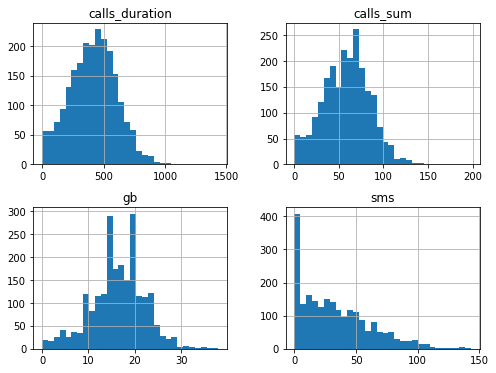

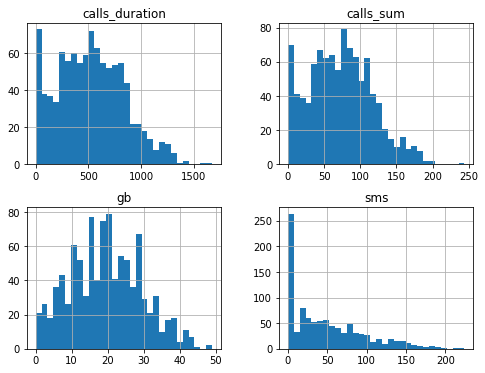

In [36]:
overall.drop(columns=['user_id', 'income']).groupby('tariff').hist(bins=30, figsize=(8, 6));

В целом все гистограммы (кроме СМС) показывают распределение, похожее на нормальное. В данных нет выбросов и других аномалий.  
  
На гистограммах видно, что пользователи тарифа «Смарт» (два верхних ряда графиков) чаще выходят за установленные лимиты: длительность звонков распределена вокруг 450 минут (при лимите в 500 минут), объём трафика — вокруг 16 ГБ (лимит — 15 ГБ). Это значит, что около половины клиентов используют больший объем услуг, чем установлено лимитом их тарифа.  
  
В то же время пользователи «Ультра» вообще не превышают лимиты по звонкам и сообщениям (правая сторона графиков упирается в значения меньшие, чем лимит за услугу) и почти не превышают лимит по объёму трафика: он распределён вокруг 20 ГБ, за лимит 30 ГБ выходит только небольшой «хвост» справа.
 
А вот в данных об СМС большой выброс в нуле. Многие пользователи совсем не пишут стандартные сообщения, предпочитая мессенджеры. Посмотрим отдельно на данные о тех пользователях, которые пользуются СМС.

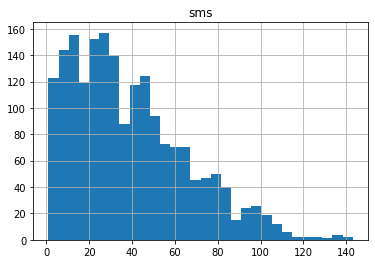

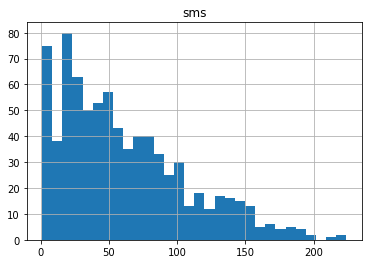

In [37]:
overall.query('sms > 0').groupby('tariff').hist('sms', bins=30);

В целом можно говорить о том, что пользователи обоих тарифов похоже используют сообщения, но пользователи тарифа Ultra в среднем отправляют больше сообщений. Распределения обоих графиков напоминает нормальное, однако скошенное вправо. Значит, есть выбросы в районе больших значений. Проверим это.

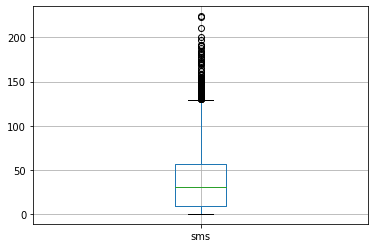

In [38]:
overall.boxplot('sms');

Диаграмма размаха показывает, что значения больше 130 — выбросы. Проверим, сколько их и какое количество СМС в месяц максимальное.

In [39]:
overall.query('sms>130')['user_id'].count()

87

In [40]:
overall['sms'].max()

224.0

Из более чем 3 тысяч наблюдений всего 87 раз пользователи отправили больше 130 сообщений в месяц. При этом максимальное количество сообщений в месяц — 224. Это вполне реалистичные числа, их нельзя считать выбросами. Просто есть определённый процент людей, которые всё ещё пользуются сообщениями (например, по работе).

Посмотрим также, сколько людей вообще не используют СМС.

In [41]:
users_mean.query('sms==0')['user_id'].count() / 500

0.148

### Вывод

1. Пользователи тарифа «Смарт» в среднем используют меньший объём услуг, чем пользователи тарифа «Ультра».
2. Пользователи тарифа «Смарт» в среднем используют больший объём услуг относительно своего месячного лимита и часто превышают его. Некоторые пользователи платят в месяц больше, чем некоторые пользователи «Ультра». Возможно, им стоит предложить перейти на более дорогой тариф, чтобы они сэкономили на дополнительных пакетах и не ушли к другому оператору из-за больших трат.
3. В целом все показатели распределены нормально с некоторыми реалистичными и объяснимыми скосами.
4. Достаточно много людей вообще не используют СМС. Возможно, стоит сделать для них отдельный более выгодный тариф, не включающий пакет сообщений.

<a id='hyp'></a>

## Проверяем гипотезы <a name="hypothesis"></a>

### Гипотеза №1: Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются.

Сформулируем нулевую и альтернативную гипотезы. По правилам статистики нулевая гипотеза должна содержать знак равенства. Поэтому *Н0* у нас: «Средняя выручка пользователей тарифов “Ультра” и “Смарт” одинаковая». Альтернативная гипотеза *Н1*: «Средняя выручка пользователей тарифов “Ультра” и “Смарт” различается».

Для начала создадим две выборки: одна из пользователей тарифа «Смарт», другая — «Ультра».

In [42]:
smart_users = overall.query('tariff == "smart"')['income']
ultra_users = overall.query('tariff == "ultra"')['income']

С помощью метода `ttest_ind` библиотеки `scipy` проверим гипотезу о равенстве средних двух выборок.

In [43]:
st.ttest_ind(smart_users, ultra_users, equal_var=False) # параметр equal_var установим равным False,
# потому что не знаем наверняка, равны ли дисперсии выборок

Ttest_indResult(statistic=-37.047170235598124, pvalue=1.927011394420941e-250)

Показатель p-value ≈ 2 на 10 в минус 250-й степени: это экстремально мало. Значение статистики t-распределения Стьюдента -37 при том, что около 95% значений должны лежать в промежутке (-2; 2). При этом в выборках нет выбросов, которые могли бы сильно сместить показатели t-распределения. Можно смело отвергать нулевую гипотезу и говорить о том, что средние выручки пользователей двух тарифов отличаются.

### Гипотеза №2: Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Нулевая гипотеза предполагает равенство, значит *Н0*: «Средняя выручка пользователей из Москвы такая же, как пользователей из других регионов», а *Н1*: «Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов». Проверим эти гипотезы. Для начала создадим сводную таблицу, в которой каждому пользователю будет соответствовать его город и выручка.

In [44]:
users_city = (
    overall
    .merge(
        users[['user_id', 'city']],
        how='left',
        on='user_id'
    )
)
users_city.head()

,user_id,gb,calls_duration,calls_sum,sms,tariff,income,city
0,1000,3.0,159.0,22.0,22.0,ultra,1950.0,Краснодар
1,1000,23.0,172.0,43.0,60.0,ultra,1950.0,Краснодар
2,1000,14.0,340.0,47.0,75.0,ultra,1950.0,Краснодар
3,1000,14.0,408.0,52.0,81.0,ultra,1950.0,Краснодар
4,1000,15.0,466.0,58.0,57.0,ultra,1950.0,Краснодар


Теперь разделим полученную сводную таблицу на две выборки: людей из Москвы и людей из остальных регионов России.

In [45]:
moscow_users = users_city.query('city == "Москва"')['income']
other_users = users_city.query('city != "Москва"')['income']

С помощью t-критерия Стьюдента проверим гипотезу о равенстве средних выручек пользователей из Москвы и не-Москвы.

In [46]:
st.ttest_ind(moscow_users, other_users, equal_var=False)

Ttest_indResult(statistic=0.6409677091149435, pvalue=0.5216952110000278)

Показатель `p-value` не только больше стандартного порога 0.05, а составляет больше 0.52. Это означает, что нулевую гипотезу мы отвергнуть не можем, и что с довольно большой вероятностью средняя выручка пользователей из Москвы и людей из других регионов не отличается.

In [47]:
samp1 = [5, 5, 5, 5, 5, 5, 5, 5, 5, 300]
samp2 = [5, 5, 5, 5, 5, 5, 5, 5, 5, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300]
samp3 = [35, 35, 35, 35, 35, 35, 35, 35, 35, 35]

In [48]:
st.ttest_ind(samp1, samp3)

Ttest_indResult(statistic=-0.01694915254237288, pvalue=0.9866636395400332)

In [49]:
st.ttest_ind(samp2, samp3)

Ttest_indResult(statistic=2.594875762285375, pvalue=0.015112002590439632)

### Вывод

1. Показатели средней выручки пользователей тарифов «Ультра» и «Смарт» статистически значимо различаются. Тариф «Ультра» в среднем на каждого пользователя приносит больше денег.
2. Показатели выручки пользователей из Москвы и остальной России статистически значимых отличий не имеют. С большой вероятностью люди из других городов в среднем приносят «Мегалайну» столько же денег, сколько и москвичи.

<a id='conclusion'></a>

## Итоговый вывод

В ходе работы мы объединили информацию из нескольких отдельных таблиц и свели необходимые для анализа данные в один набор, отсеив ненужные. Объединение производили в несколько этапов:
  - собрали сводные таблицы по пользователям и месяцам для каждой услуги (звонки, сообщения и интернет);
  - соединили таблицы, получив одну общую;
  - для каждого месяца каждого пользователя посчитали превышение лимита, а затем общую выручку;
  - построили сводную таблицу со всеми данными в среднем для каждого пользователя.  
    
Мы потратили довольно много времени на подготовку данных к анализу, но с помощью созданной таблицы смогли быстро и легко проанализировать все необходимые параметры.
1. Пользователи более дорогого тарифа «Ультра» в среднем потребляют больший объем услуг, чем пользователи «Смарта».
2. Если посмотреть на траты не только в абсолютном выражении, но и относительно лимитов, окажется, что пользователи «Смарта» в среднем чаще их превышают и на бóльшие суммы. Стандартное отклонение выручки этих пользователей говорит о том, что некоторые из них платят в месяц больше, чем многие пользователи «Ультра».
3. Данные о потреблении услуг распределены нормально, то есть большинству пользователей нужен довольно определённый объем трафика, звонков и сообщений в месяц. При этом на гистограммах опять же видно, что больше пользователей «Смарта» (примерно половина) выходят за установленные лимиты и переплачивают. Возможно, стоит предложить им другой, более подходящий их запросам, тариф.
4. Около 15% людей не пользуются сообщениями. Возможно, стоит разработать новый тариф, не включающий СМС, но включающий больше интернет-трафика.  
  
*Нужно помнить, что эти выводы мы получили по выборке, поэтому они могут быть неточными.*  
  
Чтобы делать более объективные выводы о генеральной совокупности, мы сформулировали и проверили гипотезы.  
1. Первую гипотезу о равенстве выручек пользователей двух тарифов пришлось отвергнуть. Параметр `p-value` оказался экстремально низким — это значит, что с очень высокой вероятностью выручки различаются.  
2. Вторую гипотезу о том, что выручки пользователей из Москвы и остальных регионов России равны, отвергнуть не получилось. Параметр `p-value` больше 0.52, значит с довольно высокой вероятностью выручки не различаются.